# Introduction to Pandas

## Introduction

As a data analyst with Python in your tool kit, one of the libraries you will use most often will be Pandas. Pandas is a useful library that makes data wrangling, transformation, and analysis easier and more intuitive. In this lesson, we will learn about Pandas data structures and how to apply some basic math functions to them.

As with Numpy in the previous lesson, you must import Pandas to be able to use it. Just like Numpy is typically aliased to np, Pandas is usually aliased to pd. Let’s import both of them so that we can use them in this lesson.

In [1]:
import numpy as np
import pandas as pd

Now that both libraries are imported, we can begin using them.

## Pandas Data Structures

The primary data structures in Pandas are Series and DataFrames. A series is an indexed one-dimensional array where the values can be of any data type. Let’s create a series consisting of 10 random numbers using the Pandas Series() method.

In [2]:
a = pd.Series(np.random.random(10))
print(a)

0    0.278299
1    0.452026
2    0.448292
3    0.405264
4    0.734317
5    0.536434
6    0.739402
7    0.921825
8    0.906692
9    0.653778
dtype: float64


As you can see, this generated an indexed array of random numbers. Just as with other Python data structures, we can reference the elements of this array by their indexes.

In [3]:
a[0]

0.2782993775124434

In [4]:
a[5]

0.5364338892800812

The other type of data structure, DataFrames, are two-dimensional indexed structures where each column can be of a different data type. DataFrames are very similar to spreadsheets and database tables, and they are one of the most useful data structures you will be working with as a data analyst.

DataFrames can be generated using the Pandas DataFrame method as follows. We are also going to assign specific column names to each column in the data frame by passing a variable named colnames with a list of column names to the columns argument.

In [ ]:
colnames = ['Column1','Column2','Column3','Column4','Column5']
df = pd.DataFrame(np.random.random((10,5)), columns=colnames)
df

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [24]:
df.nunique()

LotSize         10
Neighborhood     9
YearBuilt       10
Quality          4
SalePrice       10
dtype: int64

We can reference each of the columns in a data frame directly by the column name as follows.

In [6]:
df['Column1']

0    0.775056
1    0.140949
2    0.799098
3    0.848362
4    0.069659
5    0.205197
6    0.476791
7    0.153842
8    0.821569
9    0.784084
Name: Column1, dtype: float64

## Converting Other Data Structures to DataFrames

We can apply the same `pd.DataFrame` method to that list of lists and Pandas will create a data frame with columns based on each index in the sublists.

In [7]:
lst_lst = [[8450, 'CollgCr', 2003, 7, 208500],
           [9600, 'Veenker', 1976, 6, 181500],
           [11250, 'CollgCr', 2001, 7, 223500],
           [9550, 'Crawfor', 1915, 7, 140000],
           [14260, 'NoRidge', 2000, 8, 250000],
           [14115, 'Mitchel', 1993, 5, 143000],
           [10084, 'Somerst', 2004, 8, 307000],
           [10382, 'NWAmes', 1973, 7, 200000],
           [6120, 'OldTown', 1931, 7, 129900],
           [7420, 'BrkSide', 1939, 5, 118000]]

colnames = ['LotSize','Neighborhood','YearBuilt','Quality','SalePrice']

df = pd.DataFrame(lst_lst, columns=colnames)
df

,LotSize,Neighborhood,YearBuilt,Quality,SalePrice
0,8450,CollgCr,2003,7,208500
1,9600,Veenker,1976,6,181500
2,11250,CollgCr,2001,7,223500
3,9550,Crawfor,1915,7,140000
4,14260,NoRidge,2000,8,250000
5,14115,Mitchel,1993,5,143000
6,10084,Somerst,2004,8,307000
7,10382,NWAmes,1973,7,200000
8,6120,OldTown,1931,7,129900
9,7420,BrkSide,1939,5,118000


In [8]:
df.head()

,LotSize,Neighborhood,YearBuilt,Quality,SalePrice
0,8450,CollgCr,2003,7,208500
1,9600,Veenker,1976,6,181500
2,11250,CollgCr,2001,7,223500
3,9550,Crawfor,1915,7,140000
4,14260,NoRidge,2000,8,250000


List are not the only data structures that can be converted to a data frame. Data frames can also be created from data stored in a dictionary. Suppose we had a dictionary where the values contained the same information we had in our list of lists, but the keys of the dictionary consisted of the names of each house.

In [9]:
house_dict = {'Baker House': [7420, 'BrkSide', 1939, 5, 118000],
              'Beazley House': [14115, 'Mitchel', 1993, 5, 143000],
              'Dominguez House': [14260, 'Mitchel', 2000, 8, 250000],
              'Hamilton House': [6120, 'BrkSide', 1931, 7, 129900],
              'James House': [11250, 'Nottinhill', 2001, 7, 223500],
              'Martinez House': [9600, 'BrkSide', 1976, 6, 181500],
              'Roberts House': [9550, 'Crawfor', 1915, 7, 140000],
              'Smith House': [8450, 'CollgCr', 2003, 7, 208500],
              'Snyder House': [10084, 'BrkSide', 2004, 8, 307000],
              'Zuckerman House': [10382, 'Mitchel', 1973, 7, 200000]}

house_df = pd.DataFrame(house_dict)

house_df

,Baker House,Beazley House,Dominguez House,Hamilton House,James House,Martinez House,Roberts House,Smith House,Snyder House,Zuckerman House
0,7420,14115,14260,6120,11250,9600,9550,8450,10084,10382
1,BrkSide,Mitchel,Mitchel,BrkSide,Nottinhill,BrkSide,Crawfor,CollgCr,BrkSide,Mitchel
2,1939,1993,2000,1931,2001,1976,1915,2003,2004,1973
3,5,5,8,7,7,6,7,7,8,7
4,118000,143000,250000,129900,223500,181500,140000,208500,307000,200000


This is not the format we want for our data. Instead, we want each house represented as a row and the attributes of the houses represented as columns. There are (at least) two ways to transform the data frame to the format we want. Both methods below will return the same result - a data frame with houses as rows and house attributes as columns.

In [10]:
# You can transpose the result and adjust the column names.
house_df = pd.DataFrame(house_dict).transpose()
house_df.columns = colnames

house_df

,LotSize,Neighborhood,YearBuilt,Quality,SalePrice
Baker House,7420,BrkSide,1939,5,118000
Beazley House,14115,Mitchel,1993,5,143000
Dominguez House,14260,Mitchel,2000,8,250000
Hamilton House,6120,BrkSide,1931,7,129900
James House,11250,Nottinhill,2001,7,223500
Martinez House,9600,BrkSide,1976,6,181500
Roberts House,9550,Crawfor,1915,7,140000
Smith House,8450,CollgCr,2003,7,208500
Snyder House,10084,BrkSide,2004,8,307000
Zuckerman House,10382,Mitchel,1973,7,200000


In [11]:
# Or you can add the from_dict method and specify 'index' for the orient parameter, and then adjust your column names.
house_df = pd.DataFrame.from_dict(house_dict, orient='index')
house_df.columns = colnames

house_df

,LotSize,Neighborhood,YearBuilt,Quality,SalePrice
Baker House,7420,BrkSide,1939,5,118000
Beazley House,14115,Mitchel,1993,5,143000
Dominguez House,14260,Mitchel,2000,8,250000
Hamilton House,6120,BrkSide,1931,7,129900
James House,11250,Nottinhill,2001,7,223500
Martinez House,9600,BrkSide,1976,6,181500
Roberts House,9550,Crawfor,1915,7,140000
Smith House,8450,CollgCr,2003,7,208500
Snyder House,10084,BrkSide,2004,8,307000
Zuckerman House,10382,Mitchel,1973,7,200000


## Applying Mathematical Functions to Data Frames

Like Numpy, Pandas also has some built-in mathematical functions that you can apply to series and data frames. Let’s take a look at some of the basic ones.

In [12]:
# Total price of all houses sold
house_df['SalePrice'].sum()

1901400

In [13]:
# Average lot size of houses sold
house_df['LotSize'].mean()

10123.1

In [14]:
# The latest year a house in the data set was built
house_df['YearBuilt'].max()

2004

In [15]:
# The eariliest year a house in the data set was built
house_df['YearBuilt'].min()

1915

## Aggregations

In [16]:
house_df

,LotSize,Neighborhood,YearBuilt,Quality,SalePrice
Baker House,7420,BrkSide,1939,5,118000
Beazley House,14115,Mitchel,1993,5,143000
Dominguez House,14260,Mitchel,2000,8,250000
Hamilton House,6120,BrkSide,1931,7,129900
James House,11250,Nottinhill,2001,7,223500
Martinez House,9600,BrkSide,1976,6,181500
Roberts House,9550,Crawfor,1915,7,140000
Smith House,8450,CollgCr,2003,7,208500
Snyder House,10084,BrkSide,2004,8,307000
Zuckerman House,10382,Mitchel,1973,7,200000


In [17]:
house_df.groupby('Neighborhood').mean()

,LotSize,YearBuilt,Quality,SalePrice
Neighborhood,,,,
BrkSide,8306.0,1962.500000,6.500000,184100.000000
CollgCr,8450.0,2003.000000,7.000000,208500.000000
Crawfor,9550.0,1915.000000,7.000000,140000.000000
Mitchel,12919.0,1988.666667,6.666667,197666.666667
Nottinhill,11250.0,2001.000000,7.000000,223500.000000


In [ ]:
house_df.groupby(['Neighborhood', 'Quality']).mean()

## Filters

In [ ]:
house_df[house_df['Neighborhood'] == 'BrkSide']

In [27]:
house_df[house_df['Neighborhood'] == 'BrkSide'].max()

LotSize           10084
Neighborhood    BrkSide
YearBuilt          2004
Quality               8
SalePrice        307000
dtype: object

## Seaborn

https://seaborn.pydata.org/index.html

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.barplot(x="Neighborhood", y="SalePrice", hue="Quality", data=house_df);

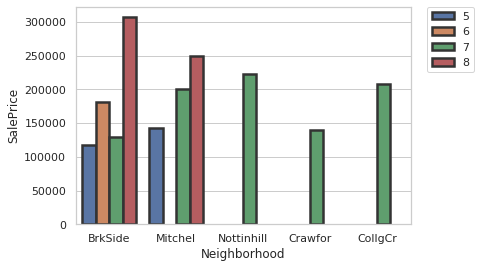

In [20]:
sns.barplot(x="Neighborhood", y="SalePrice", hue="Quality", 
            data=house_df, linewidth=2.5,
            errcolor=".2", edgecolor=".2")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)